In [1]:
from scipy.optimize import root, curve_fit
from scipy.integrate import odeint
from scipy import stats
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [101]:
#Read file 

name_group = 'Y_LF' # SELECT: Y_LF, Y_HF, O_LF or O_HF


data_unl = pd.read_excel('glucose_data.xlsx', name_group) #tab selection: Y_LF, Y_HF, O_LF or O_HF'
data_lab = pd.read_excel('tracer_data.xlsx', name_group) #tab selection: Y_LF, Y_HF, O_LF or O_HF'
data_ins = pd.read_excel('insulin_data.xlsx', name_group) #tab selection: Y_LF, Y_HF, O_LF or O_HF'

t1 = data_unl['t'].to_numpy()
t_ins = data_ins['t'].to_numpy()

#Ctrl + / comments a full region of the code
#datafile (lab or unl) is a matrix containing all mice in the Y_LFD group and all time points
#Each row is a different mouse, and each column a timepoint
#datafile[[0]][[0]] gives first row, [[1]][[0]] second row and so on

# datafile_ins[0] access first line of matrix
# datafile_ins[:,0] access first column of matrix

matrix_unl = np.array(data_unl)
datafile_unl = np.delete(matrix_unl, 0,1)
datafile_unl = datafile_unl.T

matrix_lab = np.array(data_lab)
datafile_lab = np.delete(matrix_lab, 0,1)
datafile_lab = datafile_lab.T

matrix_ins = np.array(data_ins)
datafile_ins = np.delete(matrix_ins, 0,1)
datafile_ins = datafile_ins.T

14
[  0   5  15  30  45  60  90 120]
[0.         0.20345261 0.43014018 0.3445187  0.25950302 0.1969761
 0.09181772 0.04696415]


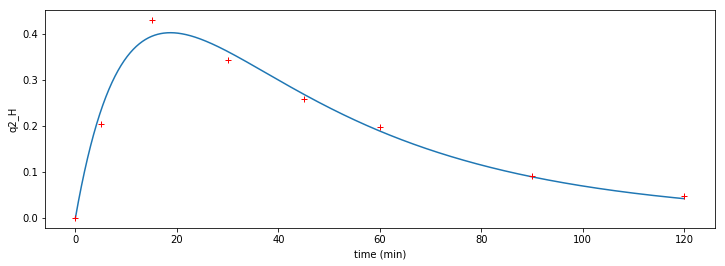

506.3183722650871
C1= 0.8768275448345745
ka = 0.09704097778286015
ke= 0.025345603437079048
[  0   5  15  30  45  60  90 120]
[0.         0.16305423 0.4242629  0.35028044 0.22368897 0.18349399
 0.05534359 0.02973372]


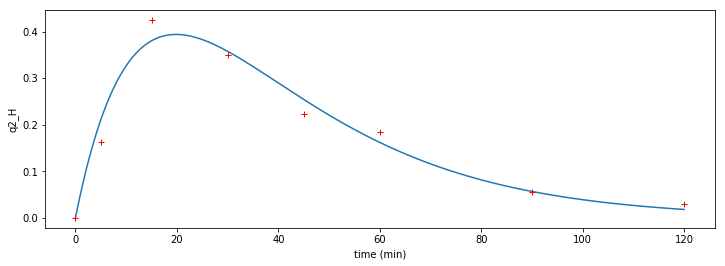

371.89600808538995
C1= 2.589728260809863
ka = 0.06160760550272214
ke= 0.04062630227587119
[  0   5  15  30  45  60  90 120]
[0.         0.13824108 0.26715847 0.34443377 0.34762543 0.24174119
 0.16120522 0.09821219]


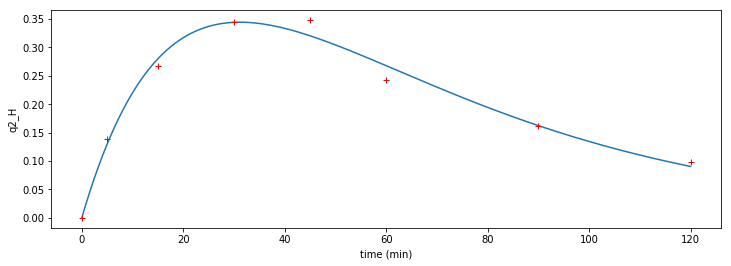

484.6118549836341
C1= 1.2974597334297195
ka = 0.04533346284740464
ke= 0.021684896601680898
[  0   5  15  30  45  60  90 120]
[0.         0.22534594 0.41893416 0.37807757 0.28987552 0.19436534
 0.09330393 0.04731198]


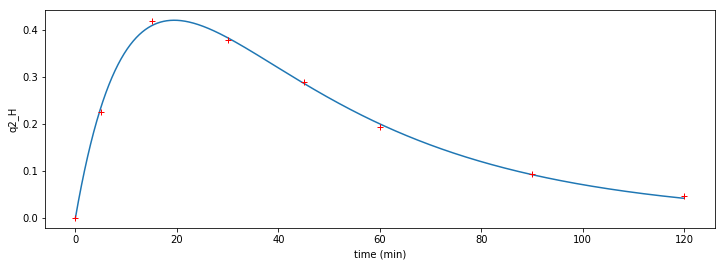

464.8514708803647
C1= 1.0095898285011542
ka = 0.0881981000784186
ke= 0.02655650083390433
[  0   5  15  30  45  60  90 120]
[0.         0.13344223 0.26126497 0.30011708 0.25809453 0.20089598
 0.11206238 0.04190646]


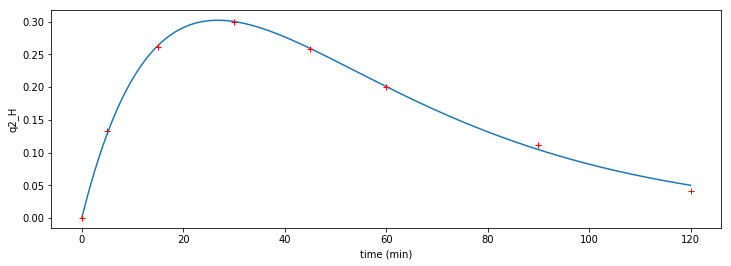

527.4768603977503
C1= 1.343156682139122
ka = 0.05009097564236166
ke= 0.0269008423521984
[  0   5  15  30  45  60  90 120]
[0.         0.22553537 0.49314346 0.34116575 0.25542647 0.17690207
 0.09955251 0.05267216]


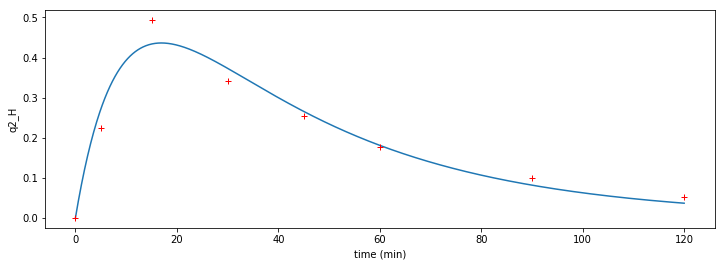

478.101434022214
C1= 0.9043682049844487
ka = 0.11061497830184887
ke= 0.02670329167910362
[  0   5  15  30  45  60  90 120]
[0.         0.24353435 0.57276113 0.31911866 0.24162112 0.21816087
 0.10263141 0.05035267]


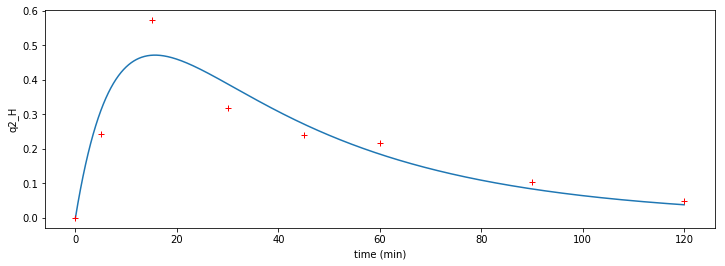

459.80429680096023
C1= 0.9018085971073462
ka = 0.12620581294688987
ke= 0.026374724592948717
[  0   5  15  30  45  60  90 120]
[0.         0.24516689 0.46350252 0.30127109 0.21827754 0.15188102
 0.04692664 0.02073933]


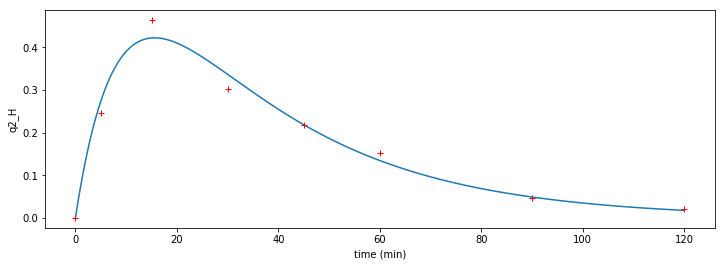

456.7548339361601
C1= 1.0478564780957413
ka = 0.10810590950498287
ke= 0.034019538236403545
[  0   5  15  30  45  60  90 120]
[0.         0.22396362 0.4180473  0.35822789 0.2468479  0.19114495
 0.06470865 0.01557085]


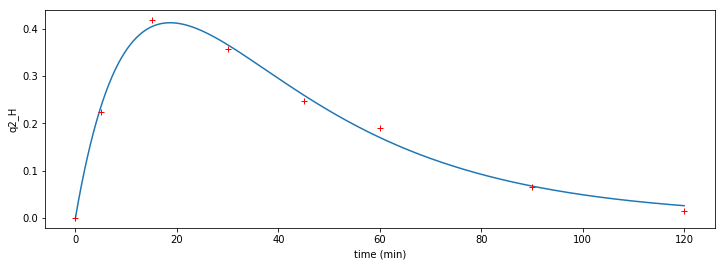

435.7485214319534
C1= 1.231199190020741
ka = 0.08278937834046832
ke= 0.03217379784981743
[  0   5  15  30  45  60  90 120]
[0.         0.23631406 0.38958085 0.25635953 0.15691742 0.10581462
 0.04469874 0.01792489]


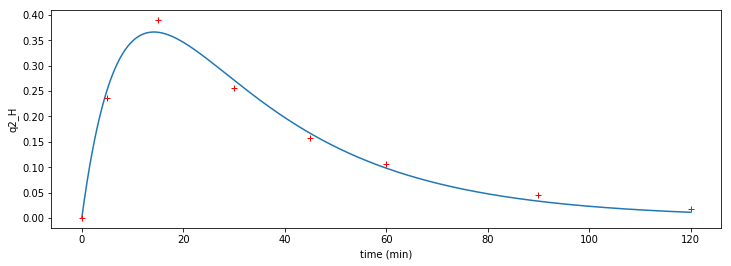

532.9510492055911
C1= 0.8823902997067348
ka = 0.1206479112982697
ke= 0.03649956129794453
[  0   5  15  30  45  60  90 120]
[0.         0.17750879 0.46259631 0.34718381 0.26056748 0.19875047
 0.08911617 0.05929977]


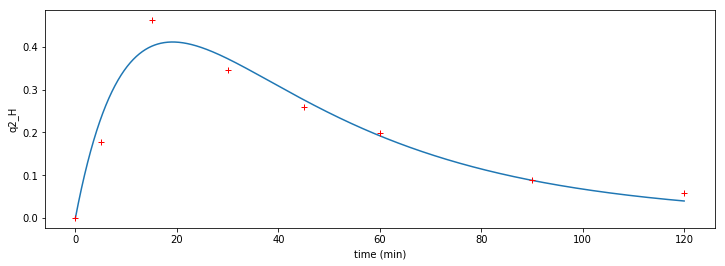

477.8261378617969
C1= 0.9742099704410648
ka = 0.09034308171927977
ke= 0.02668606642490472
[  0   5  15  30  45  60  90 120]
[0.         0.25813904 0.48090441 0.37857069 0.25291299 0.23154862
 0.11475495 0.05531157]


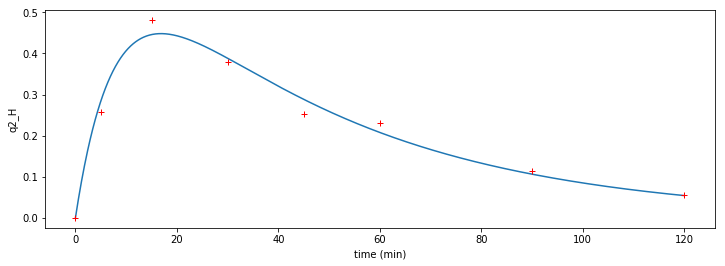

501.47406985742475
C1= 0.7985245863871833
ka = 0.1237632160230475
ke= 0.02238873222020888
[  0   5  15  30  45  60  90 120]
[0.         0.13204798 0.45557632 0.33942655 0.27861977 0.18110618
 0.08704584 0.04996679]


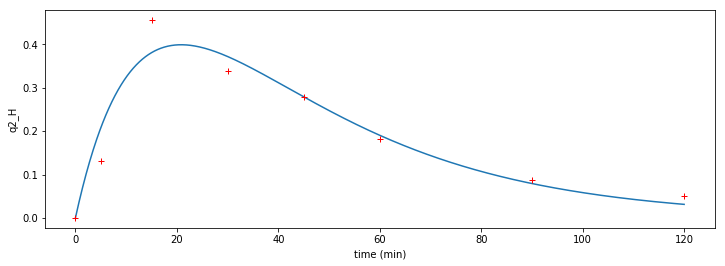

423.05548876789845
C1= 1.4442610829430458
ka = 0.0687596704793707
ke= 0.031847924578019486
[  0   5  15  30  45  60  90 120]
[0.         0.24259038 0.48408951 0.4645103  0.34306416 0.28488403
 0.12228027 0.07153154]


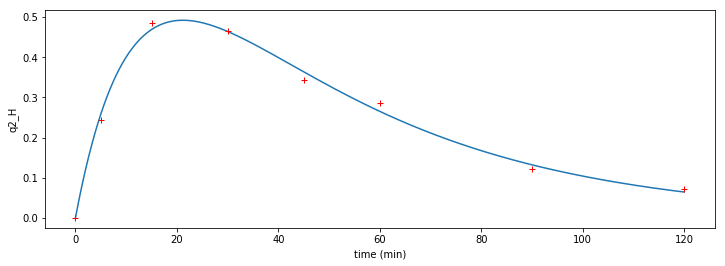

400.0526539799298
C1= 1.1622275012082188
ka = 0.08179091534787697
ke= 0.024091606811252754


In [102]:
#Fitting of labelled curve and parameter estimation

def One_Elimination(x, C1, ka, ke):
    return C1*(-np.exp(-ka*x) + np.exp(-ke*x))

results_lab = []

n=np.shape(datafile_lab)[0] #size of the array
#n=1 selection n=1 if interested only in simulating the average data for the group

print(n)

for i in range(0,n):
    x_values = t1
    y_values = datafile_lab[[i][0]]
    t2 = np.linspace(0, 120, 1201)

    print(x_values)
    print(y_values)

    #nitial guess for parameters
    C1_ = 1
    ka_ = 0.1
    ke_ = 0.02

    popt,cov = curve_fit(One_Elimination, x_values, y_values, p0=[C1_, ka_, ke_], bounds=([0.1*C1_,0.1*ka_,0.1*ke_],[10*C1_,10*ka_,10*ke_]))
    fig, (ax1) = plt.subplots(1, figsize=(12, 4))

    # Time course
    ax1.plot(t2, One_Elimination(t2, *popt))
    ax1.plot(t1, y_values, 'r+')
    ax1.set_xlabel("time (min)")
    ax1.set_ylabel("q2_H")

    plt.show()

    C1 = popt[0]
    ka = popt[1]
    ke = popt[2]
    
    Vol = -(0.8*410/C1)*ka/(ke-ka)
    print(Vol)

    print ('C1=', C1)
    print ('ka =', ka)
    print ('ke=', ke)
    
    export=popt
    results_lab.append(export)


14
[  0   5  15  30  45  60  90 120]
[ 6.13846154 13.47692308 18.95384615 14.68461538 12.36923077 11.56153846
  9.03846154  8.76923077]


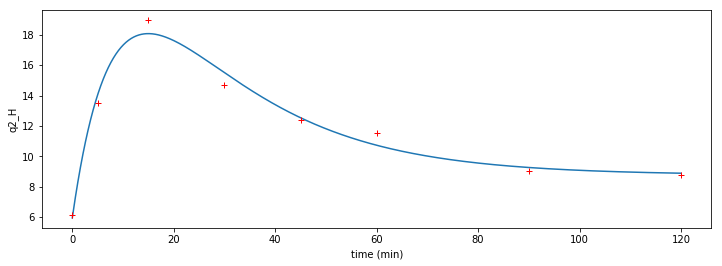

C0= 8.76266287683314
C1= -35.08320210646671
C2= 32.268373929748435
ka = 0.10916456787346764
ke= 0.046211628539609896
[  0   5  15  30  45  60  90 120]
[ 3.6  9.3 16.3 12.7 10.2 10.9  7.1  7.6]


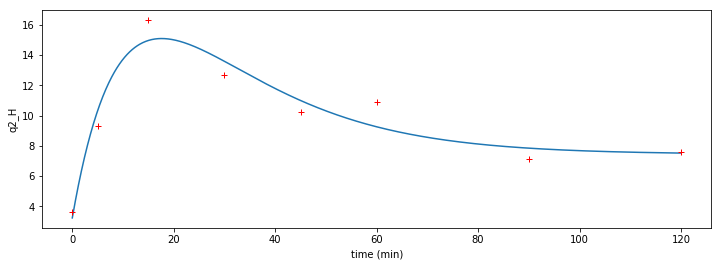

C0= 7.433383849799444
C1= -72.11223730708475
C2= 67.90690133415218
ka = 0.07891005003129901
ke= 0.055340971889406856
[  0   5  15  30  45  60  90 120]
[ 7.9 14.8 19.  18.1 16.4 12.5 11.5 11.4]


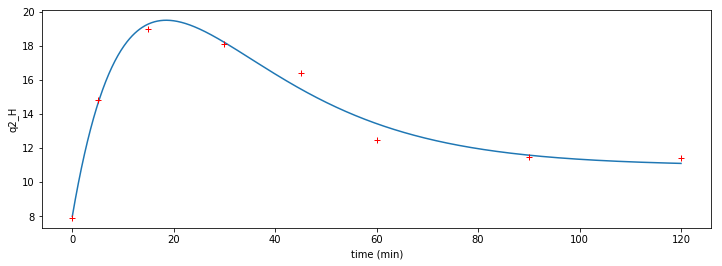

C0= 10.960076179540058
C1= -199.99999881748082
C2= 197.02741218373168
ka = 0.06420597151135508
ke= 0.05631260061406488
[  0   5  15  30  45  60  90 120]
[ 5.9 13.1 17.  15.3 12.7  9.9  7.2  7.2]


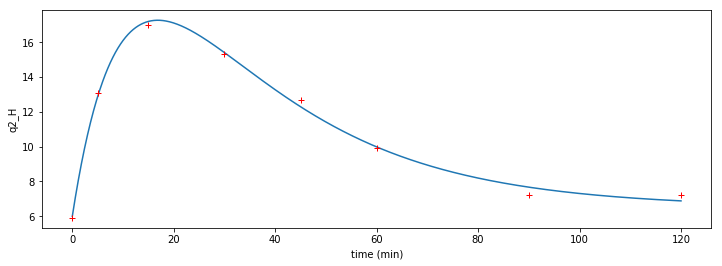

C0= 6.495902649796985
C1= -34.9444509123758
C2= 34.437795715415966
ka = 0.09097397989519071
ke= 0.03746518102910452
[  0   5  15  30  45  60  90 120]
[ 4.7  7.8 11.5 12.5 11.7 10.   8.7  6.7]


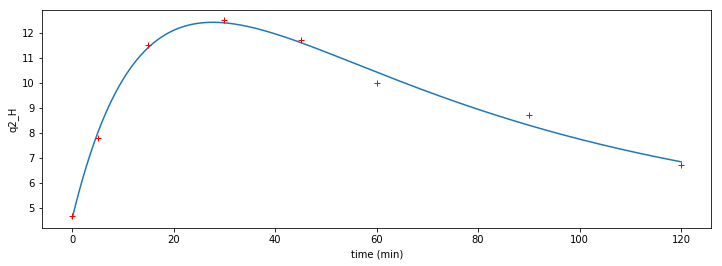

C0= 4.2276197495747505
C1= -15.42898231958272
C2= 15.805878543358558
ka = 0.06949054363259023
ke= 0.014968663905408686
[  0   5  15  30  45  60  90 120]
[ 6.5 15.5 20.1 14.  12.  11.  10.2  8.2]


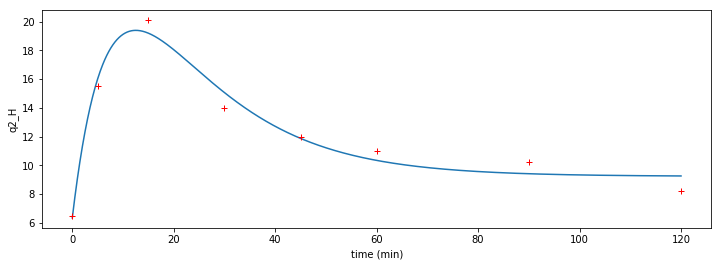

C0= 9.22838414356881
C1= -46.57531144889788
C2= 43.68412358013301
ka = 0.12076014839372015
ke= 0.06067465649756142
[  0   5  15  30  45  60  90 120]
[ 7.  18.3 24.  14.2 12.4 14.  10.8 10.7]


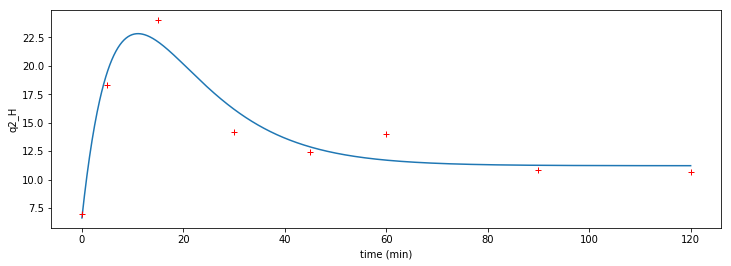

C0= 11.216648494069027
C1= -199.99999999999164
C2= 195.4131568965292
ka = 0.1115130501939384
ke= 0.09299248209629567
[  0   5  15  30  45  60  90 120]
[ 4.4 12.2 17.1 11.5  9.7  9.2  6.5  6.7]


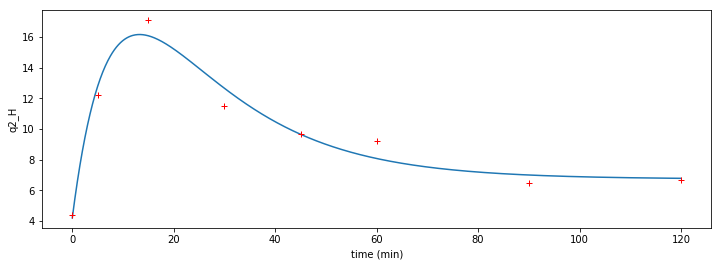

C0= 6.740506593544564
C1= -38.65040217707638
C2= 36.121038908133144
ka = 0.11768222049525538
ke= 0.05445050168892399
[  0   5  15  30  45  60  90 120]
[ 7.2 17.8 22.1 17.4 13.7 13.4 10.8 10.9]


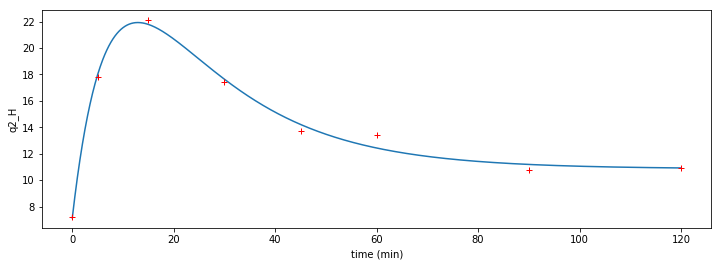

C0= 10.851533829320802
C1= -39.42356001543949
C2= 35.71361631890879
ka = 0.13151196729723863
ke= 0.05182287256351939
[  0   5  15  30  45  60  90 120]
[ 3.7  9.5 13.8  9.9  7.6  7.4  5.6  4.9]


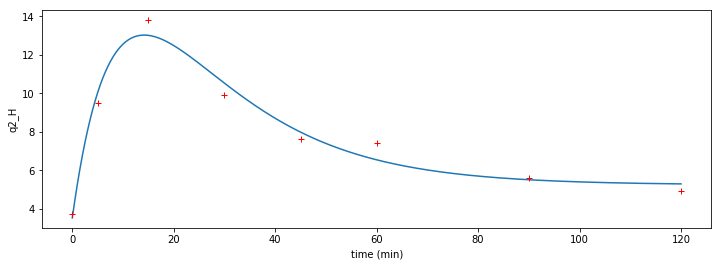

C0= 5.232345777467367
C1= -37.04740991656562
C2= 35.33166135533526
ka = 0.10270965889245426
ke= 0.05399359037172355
[  0   5  15  30  45  60  90 120]
[ 6.7 11.8 19.4 14.7 12.4 11.4  8.4  8.5]


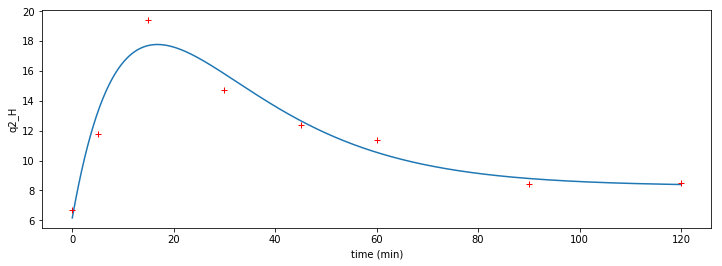

C0= 8.29437571295764
C1= -199.9999749193003
C2= 197.8616474735682
ka = 0.06871276704769352
ke= 0.059734728201527476
[  0   5  15  30  45  60  90 120]
[ 9.1 17.7 22.5 17.5 13.1 15.  11.3 10.9]


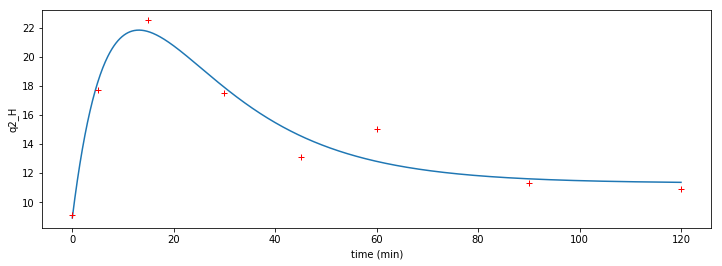

C0= 11.30994663805038
C1= -42.10707290414068
C2= 39.72342525247666
ka = 0.11771060942363772
ke= 0.054230483960272975
[  0   5  15  30  45  60  90 120]
[ 5.7 11.  21.  14.8 13.9 11.4  9.1  9.9]


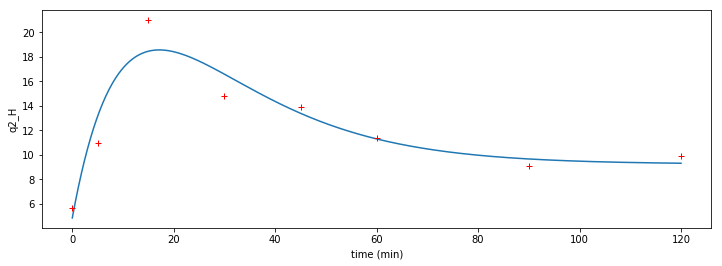

C0= 9.24657435598133
C1= -199.9999673026437
C2= 195.61354161512554
ka = 0.07209394548472613
ke= 0.062114156913002185
[  0   5  15  30  45  60  90 120]
[ 7.4 16.4 22.6 18.3 15.  14.2 10.3 10.4]


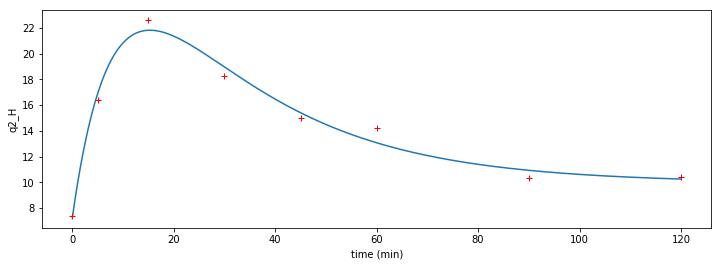

C0= 9.948167780187934
C1= -35.16400557466716
C2= 32.45130058123573
ka = 0.1150946606879527
ke= 0.03880557274547879


In [103]:
#Fitting of unlabelled curve and parameter estimation

def Two_Elimination(x, C0, C1, C2, ka, ke):
    return C0+ C1*np.exp(-ka*x) + C2* np.exp(-ke*x)


results_unl = []

n=np.shape(datafile_lab)[0] #size of the array
print(n)

for i in range(0,n):
    x_values = t1
    y_values = datafile_unl[[i][0]]
    t2 = np.linspace(0, 120, 1201)

    print(x_values)
    print(y_values)

    #nitial guess for parameters
    C0_ = 9
    C1_ = -20
    C2_ = 20
    ka_ = 0.1
    ke_ = 0.02

    popt,cov = curve_fit(Two_Elimination, x_values, y_values, p0=[C0_, C1_, C2_, ka_, ke_], bounds=([0.1*C0_,10*C1_,0.1*C2_,0.1*ka_,0.1*ke_],[10*C0_, 0.1*C1_,10*C2_,10*ka_,10*ke_]))
    fig, (ax1) = plt.subplots(1, figsize=(12, 4))

    # Time course
    ax1.plot(t2, Two_Elimination(t2, *popt))
    ax1.plot(t1, y_values, 'r+')
    ax1.set_xlabel("time (min)")
    ax1.set_ylabel("q2_H")

    plt.show()

    C0 = popt[0]
    C1 = popt[1]
    C2 = popt[2]
    ka = popt[3]
    ke = popt[4]

    print ('C0=', C0)
    print ('C1=', C1)
    print ('C2=', C2)
    print ('ka =', ka)
    print ('ke=', ke)
    
    export=popt
    results_unl.append(export)


In [14]:
#Export tracer and unalbelled glucose fits
df1 = pd.DataFrame(results_lab, columns=['C1', 'ka', 'ke'])
df2 = pd.DataFrame(results_unl, columns=['C0', 'C1', 'C2','ka','ke'])

with pd.ExcelWriter(r'C:\Users\Vieira Lara\Documents\PhD\Experiments\MV_07-OGTT\Main file - Modelling OGTT in Python\20210322-k2&insulinfit\YLFD_constants.xlsx') as writer:
    df1.to_excel(writer, sheet_name='labelled')
    df2.to_excel(writer, sheet_name='unlabelled')


In [ ]:
#Fitting of insulin curve and parameter estimation

def Two_Elimination_ins(x, C0, C1, C2, ka, ke):
    return C0+C1*(-np.exp(-ka*x)) + C2*(np.exp(-ke*x))

results_ins = []
n=np.shape(datafile_lab)[0] #size of the array
print(n)

for i in range(0,n):
    x_values = t_ins
    y_values = datafile_ins[[i][0]]
    t2 = np.linspace(0, 120, 1201)

    print(x_values)
    print(y_values)

    #nitial guess for parameters
    C0_= 19
    C1_ = 2000
    C2_ = 2000
    ka_ = 0.12
    ke_ = 0.12
    
    
    #remove Nan (non-numerical) values from array
    x_values_Nan=[]
    y_values_Nan=[]
    for j in range (0, y_values.size):
        if np.isnan(y_values[j]):
            pass
        else:
            x_values_Nan.append(x_values[j])
            y_values_Nan.append(y_values[j])
            
    print(x_values_Nan)
    print(y_values_Nan)

    popt,cov = curve_fit(Two_Elimination_ins, x_values_Nan, y_values_Nan, p0=[C0_, C1_, C2_, ka_, ke_],  bounds=([0.5*C0_,0.5*C1_,0.5*C2_,0.5*ka_,0.5*ke_],[1.5*C0_, 1.5*C1_, 1.5*C2_,1.5*ka_,1.5*ke_]))
    fig, (ax1) = plt.subplots(1, figsize=(12, 4))

    # Time course
    ax1.plot(t2, Two_Elimination_ins(t2, *popt))
    ax1.plot(x_values_Nan, y_values_Nan, 'r+')
    ax1.set_xlabel("time (min)")
    ax1.set_ylabel("data")

    plt.show()

    C0 = popt[0]
    C1 = popt[1]
    C2 = popt[2]
    ka = popt[3]
    ke = popt[4]
    
    print ('C0=', C0)
    print ('C1=', C1)
    print ('C2=', C2)
    print ('ka =', ka)
    print ('ke=', ke)
    
    export=popt
    results_ins.append(export)


In [35]:
#Export tracer and unalbelled glucose fits
df1 = pd.DataFrame(results_lab, columns=['C1', 'ka', 'ke'])
df2 = pd.DataFrame(results_unl, columns=['C0', 'C1', 'C2','ka','ke'])
df3 = pd.DataFrame(results_ins, columns=['C0', 'C1','C2','ka','ke'])

name_export = name_group+'_constants.xlsx' #incorporates selected group name in the file name

with pd.ExcelWriter(name_export) as writer:
    df1.to_excel(writer, sheet_name='labelled')
    df2.to_excel(writer, sheet_name='unlabelled')
    df3.to_excel(writer, sheet_name='insulin')





In [106]:
# Model building for EGP calculation
t2= np.linspace(0, 120, 241)

F= 0.8

q1_lab_0 = 410
Q1_unl_0 = 7900

EGP_matrix1 = []
EGP_matrix2 = []
Vol_matrix = []
EGP_matrix1.append(t2)
EGP_matrix2.append(t2)

n=np.shape(datafile_lab)[0] #size of the array


for i in range(0,n):
    vector_lab = results_lab[[i][0]] # C1, ka, ke
    vector_unl = results_unl[[i][0]] #C0, C1, C2, ka, ke



    C1_lab = vector_lab[0]
    ka_lab = vector_lab[1]
    k2 = vector_lab[2]
    k1 = F * ka_lab
    Vol= k1*(q1_lab_0)/(-C1_lab*(k2-ka_lab))
    print(Vol)
    Vol_matrix.append(Vol)


    C0_unl = vector_unl[0]
    C1_unl = vector_unl[1]
    C2_unl = vector_unl[2]
    ka_unl = vector_unl[3]
    ke_unl = vector_unl[4]



    def EGP_analytical_1(t, C0_unl, C1_unl, C2_unl, ka_unl, ke_unl, k1, k2): #in µmol/(kg*min)
        part1 = ((C1_unl*Vol)*(k2-ka_unl) - k1 *  Q1_unl_0)*np.exp(-ka_unl*t)
        part2 = ((C2_unl*Vol)*(k2-ke_unl))*np.exp(-ke_unl*t)
        part3 = k2*C0_unl*Vol
        return part1 + part2 + part3

    

    EGP_matrix1.append(EGP_analytical_1(t2, C0_unl, C1_unl, C2_unl, ka_unl, ke_unl, k1, k2))
    EGP_mM_min=EGP_analytical_1(t2, C0_unl, C1_unl, C2_unl, ka_unl, ke_unl, k1, k2)/Vol #calculates EGP in mM/min
    EGP_matrix2.append(EGP_mM_min)
 
    


506.318372265087
371.89600808539
484.61185498363403
464.85147088036473
527.4768603977503
478.10143402221405
459.8042968009602
456.7548339361601
435.74852143195346
532.951049205591
477.8261378617969
501.4740698574248
423.0554887678985
400.05265397992986


In [22]:
#Export EGP data
df1 = pd.DataFrame(EGP_matrix1)
df2 = pd.DataFrame(EGP_matrix2)
df3 = pd.DataFrame(Vol_matrix)

with pd.ExcelWriter(r'C:\Users\Vieira Lara\Documents\PhD\Experiments\MV_07-OGTT\Main file - Modelling OGTT in Python\20210323-EGP-fixedF\EGP(fixed_F)-YLFD_new.xlsx') as writer:
    df1.T.to_excel(writer, sheet_name='EGP in µmol-minKg')
    df2.T.to_excel(writer, sheet_name='EGP in mM-min')
    df3.to_excel(writer, sheet_name='estimated Vol')


In [107]:
q1_lab_0 = 410
Q1_unl_0 = 7900

F = 0.8
C1_lab = C_lab[0]
ka_lab = C_lab[1]
k2 = C_lab[2]
k1 = F * ka_lab
Vol= k1*(q1_lab_0)/(-C1_lab*(k2-ka_lab))
kL = ka_lab*(1-F)


In [112]:
#Creating simulation
#Reads results_lab, results_unl and results_ins to get constants 
#For now it's reading only the first row, corresponding to the average of the group
n = 0 #this means we're getting the first row
t = t2
C_lab = results_lab[n]
C_unl = results_unl[n]
C_ins = results_ins[n]

labelled = One_Elimination(t, C_lab[0], C_lab[1], C_lab[2])
unlabelled = Two_Elimination(t, C_unl[0], C_unl[1], C_unl[2], C_unl[3], C_unl[4])
insulin_uncorrected = Two_Elimination_ins(t, C_ins[0], C_ins[1], C_ins[2], C_ins[3], C_ins[4])

insulin = insulin_uncorrected - insulin_uncorrected[0] #insulin concentration minus basal concentration

EGP_input = EGP_analytical_1(t, C_unl[0], C_unl[1], C_unl[2], C_unl[3], C_unl[4], k1, k2)


In [173]:
# Rate equations
# All rates v are defined in μmol kg-1 min-1. Q1 is defined in μmol kg-1 and Q2 in mM. Rate constants k are all in min-1.
# For consistency Q2 is multiplied by the distribution volume Vol in mL kg-1 in v2.

Q1_L_0 = 7900; # amount of unlabelled glucose administered in μmol kg-1
Q2_L_0 = unlabelled[0]; # initial concentration of unlabelled glucose in the plasma pool in mM; computed above from the glucose data
q1_H_0 = 410 # amount of labelled glucose administered in μmol kg-1
q2_H_0 = 0

def v1(Q1):
    return k1*Q1

def v2(Q2):
    return k2*Q2

def vL(Q1):
    return kL*Q1

def model (y, t): 
        
               
    Q1_L, Q2_L, q1_H, q2_H = y
    
    dQ1_Ldt = -v1(Q1_L) - vL(Q1_L)
    dQ2_Ldt = v1(Q1_L)/Vol - v2(Q2_L)  + EGP_analytical_1(t, C_unl[0], C_unl[1], C_unl[2], C_unl[3], C_unl[4], k1, k2)/Vol  #EGP in µmol/min
    dq1_Hdt = -v1(q1_H) - vL(q1_H)
    dq2_Hdt = v1(q1_H)/Vol - v2(q2_H)
   
    return dQ1_Ldt, dQ2_Ldt, dq1_Hdt, dq2_Hdt


In [174]:
#Solve ODE

y0 = (Q1_L_0, Q2_L_0, q1_H_0, q2_H_0)
y = odeint(model, y0, t2)

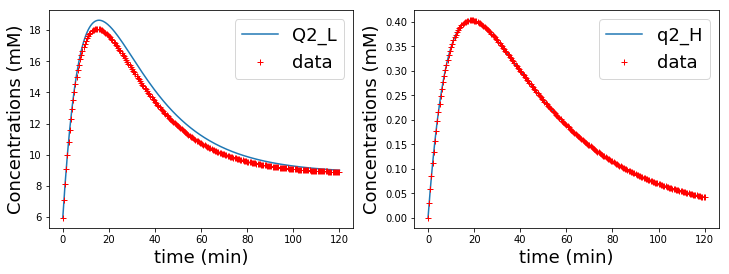

In [175]:
# Plots of solved ODE

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 4))


# Time course
ax3.plot(t2, y[:,1]) #unlabelled glucose
ax3.plot(t2, unlabelled, 'r+')
ax3.set_xlabel("time (min)", fontsize = 18)
ax3.set_ylabel("Concentrations (mM)", fontsize = 18)
ax3.legend(("Q2_L", "data",), fontsize = 18)



ax4.plot(t2, y[:,3]) #labelled glucose
ax4.plot(t2, labelled, 'r+')
ax4.set_xlabel("time (min)", fontsize = 18)
ax4.set_ylabel("Concentrations (mM)", fontsize = 18)
ax4.legend(("q2_H", 'data',), fontsize = 18)


plt.savefig ("Q2andq2_fitted.png", format='png')
plt.show()
